In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from env import get_connection

In [3]:
import acquire
import prepare
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


In [4]:
telco_df = acquire.get_telco_data('telco_churn')
telco_df.head()

,customer_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,device_protection.1,tech_support.1,streaming_tv.1,streaming_movies.1,payment_type_id.1,monthly_charges.1,total_charges.1,contract_type_id.1,paperless_billing.1,signup_date
0,0002-ORFBO,1,2,Female,0,Yes,Yes,9,Yes,No,...,No,Yes,Yes,No,2,65.6,593.3,2,Yes,2021-04-21 18:07:34
1,0003-MKNFE,1,1,Male,0,No,No,9,Yes,Yes,...,No,No,No,Yes,2,59.9,542.4,1,No,2021-04-21 18:07:34
2,0004-TLHLJ,2,1,Male,0,No,No,4,Yes,No,...,Yes,No,No,No,1,73.9,280.85,1,Yes,2021-09-21 18:07:34
3,0011-IGKFF,2,1,Male,1,Yes,No,13,Yes,No,...,Yes,No,Yes,Yes,1,98.0,1237.85,1,Yes,2020-12-21 18:07:34
4,0013-EXCHZ,2,1,Female,1,Yes,No,3,Yes,No,...,No,Yes,Yes,No,2,83.9,267.4,1,Yes,2021-10-21 18:07:34


In [5]:
telco_df.shape

(7043, 38)

In [6]:
telco_df.describe(include = 'object').T

,count,unique,top,freq
customer_id,7043,7043,0002-ORFBO,1
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933
phone_service,7043,2,Yes,6361
multiple_lines,7043,3,No,3390
online_security,7043,3,No,3498
online_backup,7043,3,No,3088
device_protection,7043,3,No,3095
tech_support,7043,3,No,3473


In [7]:
telco_df.columns

Index(['customer_id', 'internet_service_type_id', 'contract_type_id', 'gender',
       'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'phone_service.1', 'multiple_lines.1', 'internet_service_type_id.1',
       'online_security.1', 'online_backup.1', 'device_protection.1',
       'tech_support.1', 'streaming_tv.1', 'streaming_movies.1',
       'payment_type_id.1', 'monthly_charges.1', 'total_charges.1',
       'contract_type_id.1', 'paperless_billing.1', 'signup_date'],
      dtype='object')

In [8]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   internet_service_type_id    7043 non-null   int64  
 2   contract_type_id            7043 non-null   int64  
 3   gender                      7043 non-null   object 
 4   senior_citizen              7043 non-null   int64  
 5   partner                     7043 non-null   object 
 6   dependents                  7043 non-null   object 
 7   tenure                      7043 non-null   int64  
 8   phone_service               7043 non-null   object 
 9   multiple_lines              7043 non-null   object 
 10  online_security             7043 non-null   object 
 11  online_backup               7043 non-null   object 
 12  device_protection           7043 non-null   object 
 13  tech_support                7043 

# Data Preparation

In [9]:
dummy_df_telco = pd.get_dummies(telco_df[['partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'gender']], dummy_na=False, drop_first=True, dtype = int)


In [10]:
prepare_telco = prepare.prep_telco(telco_df)
prepare_telco

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,gender_Male,contract_type,contract_type_Yes
0,0002-ORFBO,0,9,65.60,593.30,One year,Yes,No,1,No,...,0,1,0,0,1,0,0,0,One year,1
1,0003-MKNFE,0,9,59.90,542.40,Month-to-month,Yes,Yes,1,No,...,0,0,0,1,0,0,0,1,Month-to-month,0
2,0004-TLHLJ,0,4,73.90,280.85,Month-to-month,Yes,No,2,No,...,0,0,0,0,1,1,1,1,Month-to-month,0
3,0011-IGKFF,1,13,98.00,1237.85,Month-to-month,Yes,No,2,No,...,0,1,0,1,1,1,1,1,Month-to-month,0
4,0013-EXCHZ,1,3,83.90,267.40,Month-to-month,Yes,No,2,No,...,0,1,0,0,1,1,1,0,Month-to-month,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,0,1,85.00,85.00,Month-to-month,Yes,Yes,2,No,...,0,0,0,1,1,1,1,0,Month-to-month,0
7039,9462-MJUAW,0,4,50.40,206.60,Month-to-month,Yes,Yes,1,No,...,0,0,0,0,0,1,0,1,Month-to-month,0
7040,9705-ZJBCG,0,13,54.15,701.05,One year,Yes,No,1,Yes,...,0,0,0,0,0,0,0,0,One year,1
7041,9777-IQHWP,0,64,93.40,5822.30,Two year,Yes,Yes,2,Yes,...,0,0,0,1,0,0,1,1,Two year,1


In [11]:
telco_train,telco_validate,telco_test=prepare.split_telco(prepare_telco)
telco_train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,gender_Male,contract_type,contract_type_Yes
440,0643-OKLRP,1,47,80.35,3825.85,Month-to-month,Yes,Yes,2,Yes,...,0,0,0,0,0,1,1,0,Month-to-month,0
67,0112-QWPNC,0,49,84.35,4059.35,One year,Yes,Yes,1,Yes,...,0,1,0,1,0,1,0,1,One year,1
600,0877-SDMBN,0,54,103.95,5639.05,One year,Yes,Yes,2,Yes,...,0,1,0,1,1,1,1,0,One year,1
4883,5799-JRCZO,0,63,19.50,1215.10,Two year,Yes,No,3,No internet service,...,1,0,1,0,0,0,0,0,Two year,1
1258,6837-BJYDQ,0,3,19.60,61.35,One year,Yes,No,3,No internet service,...,1,0,1,0,0,0,0,1,One year,1


In [12]:
telco_train.shape, telco_validate.shape, telco_test.shape

((4225, 44), (1409, 44), (1409, 44))

# Exploratory Analysis

In [13]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 440 to 6958
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   senior_citizen                         4225 non-null   int64  
 2   tenure                                 4225 non-null   int64  
 3   monthly_charges                        4225 non-null   float64
 4   total_charges                          4225 non-null   float64
 5   contract_type                          4225 non-null   object 
 6   phone_service.1                        4225 non-null   object 
 7   multiple_lines.1                       4225 non-null   object 
 8   internet_service_type_id.1             4225 non-null   int64  
 9   online_security.1                      4225 non-null   object 
 10  online_backup.1                        4225 non-null   object 
 11  device_

# Exploring through Visualizations

In [14]:
#Churn explore
telco_train.churn_Yes.value_counts()


churn_Yes
0    3130
1    1095
Name: count, dtype: int64

In [15]:
non_numeric_columns = []

for column in telco_train.columns:
    if not pd.api.types.is_numeric_dtype(telco_train[column]):
        non_numeric_columns.append(column)

print("Columns with non-numeric values:", non_numeric_columns)

Columns with non-numeric values: ['customer_id', 'contract_type', 'phone_service.1', 'multiple_lines.1', 'online_security.1', 'online_backup.1', 'device_protection.1', 'tech_support.1', 'streaming_tv.1', 'streaming_movies.1', 'total_charges.1', 'paperless_billing.1', 'signup_date', 'contract_type']


In [16]:
non_numeric_columns = ['customer_id', 'contract_type', 'phone_service.1', 'multiple_lines.1', 'online_security.1', 'online_backup.1', 'device_protection.1', 'tech_support.1', 'streaming_tv.1', 'streaming_movies.1', 'total_charges.1', 'paperless_billing.1', 'signup_date', 'contract_type']
numeric_columns = telco_train.columns.difference(non_numeric_columns)
numeric_df = telco_train[numeric_columns]


In [17]:
# correlation data
telco_correlation = numeric_df.corr()
telco_correlation

,churn_Yes,contract_type_Yes,contract_type_id.1,dependents_Yes,device_protection_No internet service,device_protection_Yes,gender_Male,internet_service_type_Fiber optic,internet_service_type_id.1,monthly_charges,...,phone_service_Yes,senior_citizen,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,tech_support_No internet service,tech_support_Yes,tenure,total_charges
churn_Yes,1.000000,-0.407609,-0.397211,-0.163289,-0.239107,-0.070910,-0.014643,0.317458,-0.055172,0.201968,...,0.007840,0.150171,-0.239107,0.061033,-0.239107,0.076659,-0.239107,-0.168316,-0.362010,-0.201213
contract_type_Yes,-0.407609,1.000000,0.917064,0.212253,0.228292,0.216687,0.007813,-0.252097,0.086788,-0.072062,...,0.014932,-0.137707,0.228292,0.109905,0.228292,0.096122,0.228292,0.278763,0.651111,0.443948
contract_type_id.1,-0.397211,0.917064,1.000000,0.227513,0.258750,0.199731,0.005885,-0.269664,0.109115,-0.097533,...,0.009519,-0.140935,0.258750,0.092375,0.258750,0.083753,0.258750,0.277377,0.669101,0.433145
dependents_Yes,-0.163289,0.212253,0.227513,1.000000,0.158541,-0.015482,0.008687,-0.171907,0.062389,-0.135237,...,-0.007870,-0.208036,0.158541,-0.048241,0.158541,-0.036609,0.158541,0.043373,0.146662,0.038158
device_protection_No internet service,-0.239107,0.228292,0.258750,0.158541,1.000000,-0.380128,0.009931,-0.467055,0.806367,-0.764420,...,0.176282,-0.195303,1.000000,-0.418903,1.000000,-0.421215,1.000000,-0.340735,-0.032503,-0.374928
device_protection_Yes,-0.070910,0.216687,0.199731,-0.015482,-0.380128,1.000000,0.006414,0.166967,-0.313595,0.475350,...,-0.076622,0.078032,-0.380128,0.416387,-0.380128,0.383245,-0.380128,0.333393,0.355405,0.516590
gender_Male,-0.014643,0.007813,0.005885,0.008687,0.009931,0.006414,1.000000,-0.018130,-0.001016,-0.012866,...,-0.001698,0.005572,0.009931,-0.013599,0.009931,-0.004391,0.009931,0.018582,0.018351,0.008739
internet_service_type_Fiber optic,0.317458,-0.252097,-0.269664,-0.171907,-0.467055,0.166967,-0.018130,1.000000,0.146328,0.787900,...,0.290906,0.264027,-0.467055,0.321345,-0.467055,0.334876,-0.467055,-0.018860,0.008747,0.358166
internet_service_type_id.1,-0.055172,0.086788,0.109115,0.062389,0.806367,-0.313595,-0.001016,0.146328,1.000000,-0.328214,...,0.391789,-0.041903,0.806367,-0.253719,0.806367,-0.247255,0.806367,-0.393814,-0.030513,-0.179894
monthly_charges,0.201968,-0.072062,-0.097533,-0.135237,-0.764420,0.475350,-0.012866,0.787900,-0.328214,1.000000,...,0.247636,0.237429,-0.764420,0.628448,-0.764420,0.631493,-0.764420,0.343688,0.233306,0.646324


In [18]:
#Explore correlation data by churn
telco_correlation_churn = telco_correlation['churn_Yes'].sort_values(ascending=False)
telco_correlation_churn

churn_Yes                                1.000000
internet_service_type_Fiber optic        0.317458
paperless_billing_Yes                    0.202320
monthly_charges.1                        0.201968
monthly_charges                          0.201968
senior_citizen                           0.150171
streaming_tv_Yes                         0.076659
streaming_movies_Yes                     0.061033
multiple_lines_Yes                       0.044192
phone_service_Yes                        0.007840
multiple_lines_No phone service         -0.007840
gender_Male                             -0.014643
internet_service_type_id.1              -0.055172
device_protection_Yes                   -0.070910
online_backup_Yes                       -0.093984
partner_Yes                             -0.151986
dependents_Yes                          -0.163289
online_security_Yes                     -0.166612
tech_support_Yes                        -0.168316
total_charges                           -0.201213


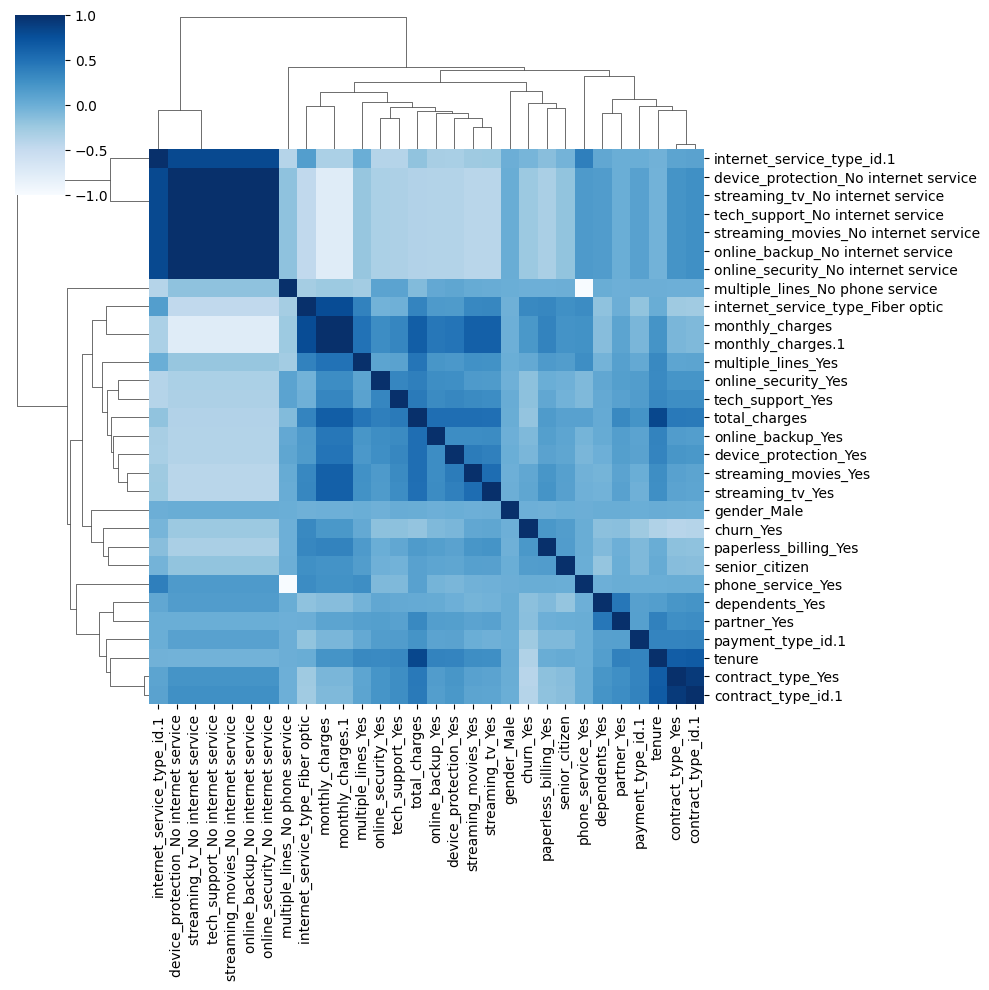

In [19]:
sns.clustermap(numeric_df.corr(), cmap = 'Blues', center = 0, annot = False)
plt.show()


In [20]:
#Exploring contract type
telco_train.contract_type_Yes.value_counts()

contract_type_Yes
0    2321
1    1904
Name: count, dtype: int64

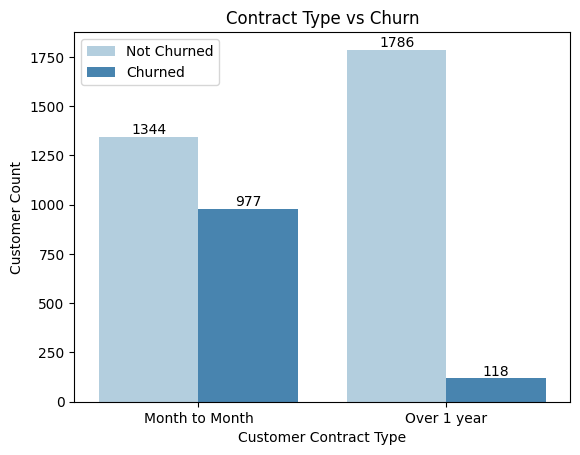

In [22]:
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = ['Month to Month', 'Over 1 year']

# Visualizing the streaming TV vs churn
ct = sns.countplot(data=telco_train, x='contract_type_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = ct.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

# Relabel the x-axis ticks
plt.xticks(range(len(x)), x)

ct.set_xlabel('Customer Contract Type')
ct.set_ylabel('Customer Count')
plt.title('Contract Type vs Churn')

plt.xticks(range(len(x)), x)
#Add count numbers on bars
for p in ct.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    ct.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Contract Type Visual Findings

The visual data indicates that the type of contract a customer has significantly affects their churn rate. Specifically, customers with longer contracts tend to churn less often.

In [25]:
## Exploring the device protection feature

telco_train.device_protection_Yes.value_counts()


device_protection_Yes
0    2797
1    1428
Name: count, dtype: int64

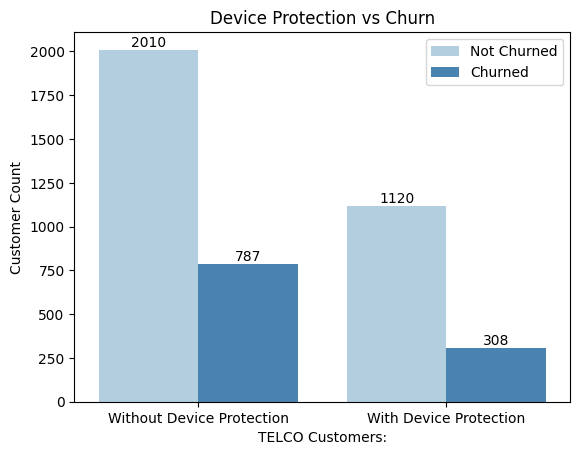

In [27]:
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = ['Without Device Protection', 'With Device Protection']

# Visualizing the streaming TV vs churn
dp = sns.countplot(data=telco_train, x='device_protection_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = dp.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

plt.xticks(range(len(x)), x)

dp.set_xlabel('TELCO Customers:')
dp.set_ylabel('Customer Count')
plt.title('Device Protection vs Churn')

# Add count numbers on bars
for p in dp.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    dp.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Device Protection Visual Findings
The visual data suggests that customers who have Device Protection experience lower churn rates compared to customers who do not have this protection.

In [28]:
# Exploring the deviceprotection feature
telco_train.streaming_tv_Yes.value_counts()

streaming_tv_Yes
0    2597
1    1628
Name: count, dtype: int64

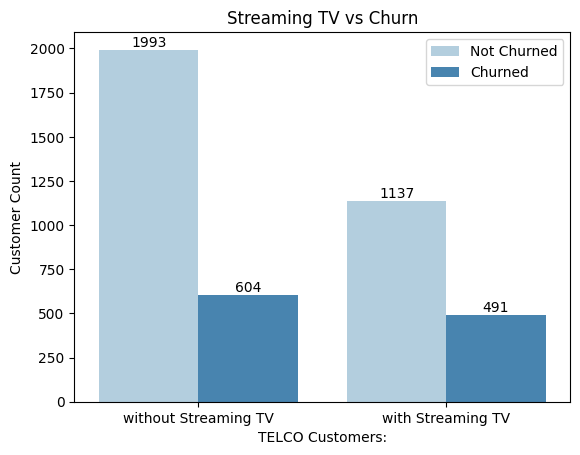

In [29]:
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = ['without Streaming TV', 'with Streaming TV']

# Visualizing the streaming TV vs churn
st = sns.countplot(data=telco_train, x='streaming_tv_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = st.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

plt.xticks(range(len(x)), x)

st.set_xlabel('TELCO Customers:')
st.set_ylabel('Customer Count')
plt.title('Streaming TV vs Churn')

# Add count numbers on bars
for p in st.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    st.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Streaming TV Visual Findings
The data visualization reveals that customers who use the streaming TV service churn slightly less compared to those who do not use it.

In [30]:
#Exploring the device protection feature
telco_train.tech_support_Yes.value_counts()


tech_support_Yes
0    2996
1    1229
Name: count, dtype: int64

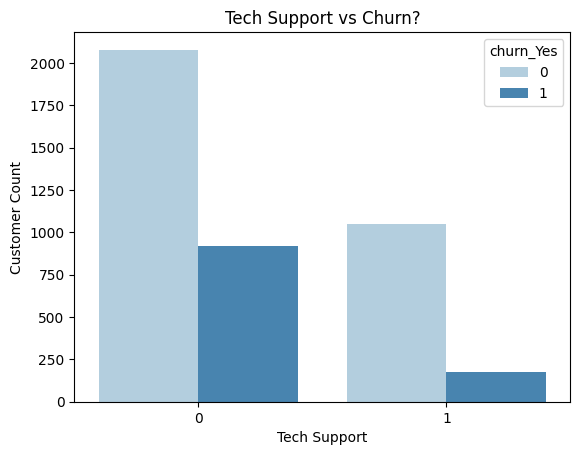

In [31]:
#Visualizing the tech support vs churn
ts=sns.countplot(data=telco_train, x='tech_support_Yes', hue='churn_Yes', palette='Blues')

ts.set_xlabel('Tech Support')
ts.set_ylabel('Customer Count')
plt.title('Tech Support vs Churn?')


plt.show()
             


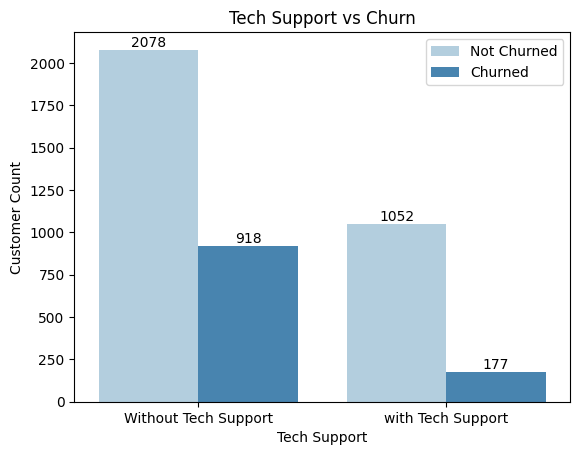

In [32]:
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = {'with Tech Support', 'Without Tech Support'}
ts = sns.countplot(data=telco_train, x='tech_support_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = ts.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

plt.xticks(range(len(x)), x)


ts.set_xlabel('Tech Support')
ts.set_ylabel('Customer Count')
plt.title('Tech Support vs Churn')

# Add count numbers on bars
for p in ts.patches:
    ts.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

# Tech Support Visual Findings
The data visualization indicates that customers who have access to tech support tend to experience notably lower churn rates compared to those who do not have such support.

# Statistical Testing

Contract Type Hypothesis:

• alpha = .05 

• H0 = Contract type is independent of customer churn 

• Ha = Contract type is dependent to customer churn  

• Outcome: We reject the Null Hypothesis.


Chi-square test using 2 discrete independent variables Contract Type vs Churn.

In [33]:
a = 0.05
ct_observed = pd.crosstab(telco_train.contract_type_Yes, telco_train.churn_Yes)
ct_observed


churn_Yes,0,1
contract_type_Yes,,
0,1344,977
1,1786,118


In [34]:
stats.chi2_contingency(ct_observed)


Chi2ContingencyResult(statistic=700.093079874913, pvalue=2.8540614952568945e-154, dof=1, expected_freq=array([[1719.46272189,  601.53727811],
       [1410.53727811,  493.46272189]]))

In [35]:
chi2, p, degf, expected = stats.chi2_contingency(ct_observed)


In [36]:
print('Observed')
print(ct_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')

Observed
[[1344  977]
 [1786  118]]

Expected
[[1719  601]
 [1410  493]]

----
chi^2 = 700.0931


In [37]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In [38]:
from scipy.stats import chi2_contingency



Chi-square statistic: 700.093079874913
p-value: 2.8540614952568945e-154
Degrees of freedom: 1
Expected frequencies: [[1719.46272189  601.53727811]
 [1410.53727811  493.46272189]]


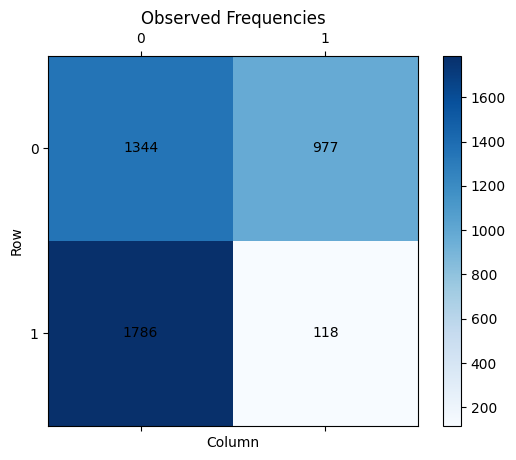

In [47]:
# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
ct_observed1 = np.array([[1344, 977],
                         [1786, 118]])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(ct_observed1)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

fig, ax = plt.subplots()
cax = ax.matshow(ct_observed1, cmap='Blues')
fig.colorbar(cax)

# Add text to each cell
for i in range(ct_observed1.shape[0]):
    for j in range(ct_observed1.shape[1]):
        ax.text(j, i, ct_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()
#This is performing a Chi-Square test of independence on a contingency table and then visualizing the observed frequencies in a box plot.
#The Chi-Square test is a statistical test used to determine if there is a significant association between two categorical variables.

- contingency table represents the relationship between churn status (churned vs. not churned) and streaming TV usage (used vs. not used), you might label "Category 1" as "Churned" and "Category 2" as "Not Churned

# Contract type statistical Findings
The statistical analysis aligns with the insights from the visual data.
• Ha = Contract Type is dependent to customer churn

But the relationship is fair of 700 to 4225. Can be used in modeling. There is a relatively small proportion or effect size between the two compared to the overall frequency.

In the future test ones that show less visual signficance to see if their statistical findings matches the visual.



# Device Protection Hypothesis:

• alpha = .05 

• H0 = Contract type is independent of customer churn 

• Ha = Contract type is dependent to customer churn  

• Outcome: We reject the Null Hypothesis.


* Chi-square test using 2 discrete independent variables Device Protection vs Churn.

In [48]:
dp_observed = pd.crosstab(telco_train.device_protection_Yes, telco_train.churn_Yes)
dp_observed

churn_Yes,0,1
device_protection_Yes,,
0,2010,787
1,1120,308


In [49]:
stats.chi2_contingency(dp_observed)


Chi2ContingencyResult(statistic=20.90358213850427, pvalue=4.829905413203248e-06, dof=1, expected_freq=array([[2072.09704142,  724.90295858],
       [1057.90295858,  370.09704142]]))

In [50]:
chi2, p, degf, expected = stats.chi2_contingency(dp_observed)


In [51]:
print('Observed')
print(dp_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[2010  787]
 [1120  308]]

Expected
[[2072  724]
 [1057  370]]

----
chi^2 = 20.9036
p     = 0.0000


In [53]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


Device Protection Statistical Findings

The statistical data corroberates with the visual data that

• Ha = Streaming TV is dependent to customer churn

But the relationship is extreamly low of 20 to 4225. This will not be used in modeling.



# Tech Support Hypothesis:
• alpha = .05

• H0 = Tech support is independent of customer churn 

• Ha = Tech support is dependent to customer churn  

• Outcome: We reject the Null Hypothesis.

Chi-square test using 2 discrete independent variables Churn and Tech Support.


In [54]:
dt_observed = pd.crosstab(telco_train.tech_support_Yes, telco_train.churn_Yes)
dt_observed

churn_Yes,0,1
tech_support_Yes,,
0,2078,918
1,1052,177


In [55]:
stats.chi2_contingency(dt_observed)


Chi2ContingencyResult(statistic=118.850516784955, pvalue=1.1292691053793043e-27, dof=1, expected_freq=array([[2219.52189349,  776.47810651],
       [ 910.47810651,  318.52189349]]))

In [56]:
chi2, p, degf, expected = stats.chi2_contingency(dt_observed)


In [57]:
print('Observed')
print(dt_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[2078  918]
 [1052  177]]

Expected
[[2219  776]
 [ 910  318]]

----
chi^2 = 118.8505
p     = 0.0000


In [58]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")


We reject the null


Tech Support Statistical Findings

The statistical data corroberates with the visual data that

• Ha = Tech support is dependent to customer churn

But the relationship is weak of 118 to 4225. Can be used in modeling.

Chi-square statistic: 118.850516784955
p-value: 1.1292691053793043e-27
Degrees of freedom: 1
Expected frequencies: [[2219.52189349  776.47810651]
 [ 910.47810651  318.52189349]]


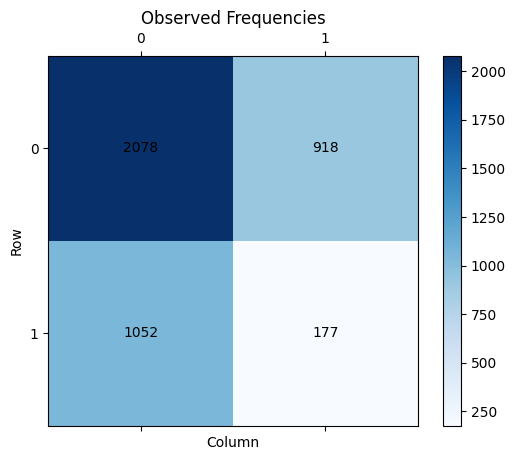

In [59]:
dt_observed1 = np.array([[2078, 918],
                         [1052, 177]])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(dt_observed1)

# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(dt_observed1, cmap='Blues')
fig.colorbar(cax)

# Add text to each cell
for i in range(dt_observed1.shape[0]):
    for j in range(dt_observed1.shape[1]):
        ax.text(j, i, dt_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()

# SUMMARY
# MODELING


In [60]:
#Splitting the data in to X and Y to take out the data with curn and those without 
telco_X_train = telco_train.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_train = telco_train.select_dtypes(exclude=['object']).churn_Yes

telco_X_validate = telco_validate.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_validate = telco_validate.select_dtypes(exclude=['object']).churn_Yes

telco_X_test = telco_test.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_test = telco_test.select_dtypes(exclude=['object']).churn_Yes

Evaluate on Baseline (Validate)

In [61]:
(telco_y_train==0).mean()


0.7408284023668639

Using the Tech Support and Contract Type for modeling. Establishing a baseline 74%. Will use Random Forest, Decision Tree, Logistic with a Random Seed = 42



Evaluate on Train

* Decision Tree

* MAKE Decision Tree


In [62]:
clf_telco_tree = DecisionTreeClassifier(max_depth=3, random_state=42)


FIT  Decision Tree

In [63]:
clf_telco_tree = clf_telco_tree.fit(telco_X_train, telco_y_train)


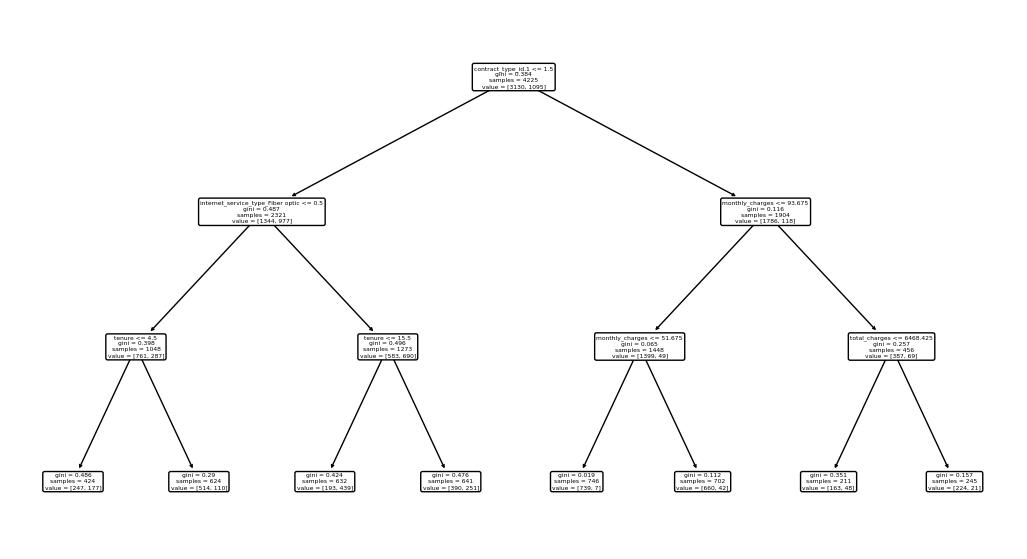

In [65]:
plt.figure(figsize=(13, 7))
plot_tree(clf_telco_tree, feature_names=telco_X_train.columns.tolist(), rounded=True)
plt.show()


In [67]:
# USE decision Tree

In [68]:
#Dataframe of predictions
telco_y_prediction = pd.DataFrame({'churn': telco_y_train,'baseline': 0, 'model_1':clf_telco_tree.predict(telco_X_train)})
telco_y_prediction

,churn,baseline,model_1
440,1,0,0
67,1,0,0
600,1,0,0
4883,0,0,0
1258,0,0,0
...,...,...,...
1794,0,0,0
817,0,0,0
901,0,0,0
1987,0,0,0


In [69]:
y_prediction_prob = clf_telco_tree.predict_proba(telco_X_train)
print(y_prediction_prob[0:5])

[[0.60842434 0.39157566]
 [0.94017094 0.05982906]
 [0.77251185 0.22748815]
 [0.99061662 0.00938338]
 [0.99061662 0.00938338]]


In [70]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_telco_tree.score(telco_X_train, telco_y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [71]:
confusion_matrix(telco_y_prediction.churn, telco_y_prediction.model_1)


array([[2937,  193],
       [ 656,  439]])

In [72]:
print(classification_report(telco_y_prediction.churn,telco_y_prediction.model_1))


              precision    recall  f1-score   support

           0       0.82      0.94      0.87      3130
           1       0.69      0.40      0.51      1095

    accuracy                           0.80      4225
   macro avg       0.76      0.67      0.69      4225
weighted avg       0.79      0.80      0.78      4225



Decision Tree Model is slightly higher than baseline average in sample data. This model can be used on validation.



# LOGISTIC REGRESSION

In [91]:
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=42, max_iter = 1000)


In [92]:
# FIT logistic regression
#  fit the model on train data
logit.fit(telco_X_train, telco_y_train)

LogisticRegression(C=1, max_iter=1000, random_state=42)

# USE Logistic Regression

In [93]:
# now use the model to make predictions
y_prediction = logit.predict(telco_X_train)
y_prediction


array([0, 0, 0, ..., 0, 0, 0])

In [94]:
telco_y_prediction.head()

,churn,baseline,model_1
440,1,0,0
67,1,0,0
600,1,0,0
4883,0,0,0
1258,0,0,0


In [95]:
telco_y_prediction['model_2'] = y_prediction


In [96]:
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(logit.score(telco_X_train, telco_y_train)))

Accuracy of Logistic Regression training set: 0.81


In [97]:
confusion_matrix(telco_y_prediction.churn, telco_y_prediction.model_2)


array([[2802,  328],
       [ 481,  614]])

In [98]:
print(classification_report(telco_y_prediction.churn,telco_y_prediction.model_2))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3130
           1       0.65      0.56      0.60      1095

    accuracy                           0.81      4225
   macro avg       0.75      0.73      0.74      4225
weighted avg       0.80      0.81      0.80      4225



# RANDOM FOREST
# MAKE Random Forest

In [99]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=42)

In [100]:
# FIT RANDOM FOREST
#building our model on our train values
rf.fit(telco_X_train, telco_y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [101]:
# USE Random Forest
#score on my train data
rf.score(telco_X_train,telco_y_train)

0.8982248520710059

In [102]:
# now use the model to make predictions
rf_y_prediction = rf.predict(telco_X_train)
rf_y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
telco_y_prediction['model_3'] =rf_y_prediction


In [104]:
#Dataframe of predictions
telco_y_prediction.head()

,churn,baseline,model_1,model_2,model_3
440,1,0,0,0,0
67,1,0,0,0,0
600,1,0,0,0,0
4883,0,0,0,0,0
1258,0,0,0,0,0


In [105]:
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(rf.score(telco_X_train, telco_y_train)))

Accuracy of Logistic Regression training set: 0.90


In [106]:
confusion_matrix(telco_y_prediction.churn, telco_y_prediction.model_3)


array([[2993,  137],
       [ 293,  802]])

In [107]:
print(classification_report(telco_y_prediction.churn,telco_y_prediction.model_3))


              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3130
           1       0.85      0.73      0.79      1095

    accuracy                           0.90      4225
   macro avg       0.88      0.84      0.86      4225
weighted avg       0.90      0.90      0.90      4225



In [108]:
# Evaluate on Validate

In [109]:
telco_validate.head()


,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,gender_Male,contract_type,contract_type_Yes
5854,3714-XPXBW,0,37,78.90,2976.95,Month-to-month,Yes,Yes,1,Yes,...,0,1,0,0,1,0,0,0,Month-to-month,0
797,4785-NKHCX,1,5,20.05,94.15,Month-to-month,Yes,No,3,No internet service,...,1,0,1,0,0,0,0,1,Month-to-month,0
3188,9530-EHPOH,0,11,53.75,608.00,Month-to-month,Yes,Yes,1,No,...,0,0,0,0,0,1,0,1,Month-to-month,0
2254,5301-GAUUY,0,32,80.35,2596.15,Month-to-month,Yes,Yes,2,No,...,0,0,0,0,1,1,1,1,Month-to-month,0
5732,1608-GMEWB,1,45,93.90,4200.25,Month-to-month,Yes,Yes,2,No,...,0,1,0,1,1,0,1,1,Month-to-month,0


In [110]:
# USE Decision Tree (Validate)
#Dataframe of predictions
telco_y_val_prediction = pd.DataFrame({'churn': telco_y_validate,'baseline': 0, 'model_1':clf_telco_tree.predict(telco_X_validate)})
telco_y_val_prediction

,churn,baseline,model_1
5854,0,0,0
797,0,0,0
3188,1,0,0
2254,1,0,0
5732,0,0,0
...,...,...,...
1045,1,0,0
4365,0,0,0
5649,0,0,0
5198,0,0,0


In [111]:
y_val_prediction_prob = clf_telco_tree.predict_proba(telco_X_validate)
print(y_val_prediction_prob[0:5])

[[0.82371795 0.17628205]
 [0.82371795 0.17628205]
 [0.82371795 0.17628205]
 [0.60842434 0.39157566]
 [0.60842434 0.39157566]]


In [112]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_telco_tree.score(telco_X_validate, telco_y_validate)))

Accuracy of Decision Tree classifier on training set: 0.78


In [113]:
confusion_matrix(telco_y_val_prediction.churn, telco_y_val_prediction.model_1)


array([[956,  63],
       [252, 138]])

In [114]:
print(classification_report(telco_y_val_prediction.churn,telco_y_val_prediction.model_1))


              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1019
           1       0.69      0.35      0.47       390

    accuracy                           0.78      1409
   macro avg       0.74      0.65      0.66      1409
weighted avg       0.76      0.78      0.75      1409



Decision Tree Model is higher than baseline average in sample data. This model can be used on validation.



# USE Logistic Regression

In [116]:
# now use the model to make predictions
val_y_prediction = logit.predict(telco_X_validate)
val_y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
#Dataframe of predictions
telco_y_val_prediction.head()

,churn,baseline,model_1
5854,0,0,0
797,0,0,0
3188,1,0,0
2254,1,0,0
5732,0,0,0


In [118]:
telco_y_val_prediction['model_2'] = val_y_prediction


In [119]:
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(logit.score(telco_X_validate, telco_y_validate)))

Accuracy of Logistic Regression training set: 0.80


In [120]:
confusion_matrix(telco_y_val_prediction.churn, telco_y_val_prediction.model_2)


array([[922,  97],
       [185, 205]])

In [121]:
print(classification_report(telco_y_val_prediction.churn,telco_y_val_prediction.model_2))


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1019
           1       0.68      0.53      0.59       390

    accuracy                           0.80      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [122]:
# USE Random Forest

In [123]:
#score on my train data
rf.score(telco_X_validate,telco_y_validate)

0.7821149751596878

In [124]:
# now use the model to make predictions
val_rf_y_prediction = rf.predict(telco_X_validate)
val_rf_y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [125]:
telco_y_val_prediction['model_3'] =val_rf_y_prediction


In [126]:
telco_y_val_prediction.head()


,churn,baseline,model_1,model_2,model_3
5854,0,0,0,0,0
797,0,0,0,0,0
3188,1,0,0,0,0
2254,1,0,0,0,0
5732,0,0,0,1,0


In [127]:
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(rf.score(telco_X_validate, telco_y_validate)))

Accuracy of Logistic Regression training set: 0.78


In [128]:
confusion_matrix(telco_y_val_prediction.churn, telco_y_val_prediction.model_3)


array([[918, 101],
       [206, 184]])

In [129]:
print(classification_report(telco_y_val_prediction.churn,telco_y_val_prediction.model_3))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1019
           1       0.65      0.47      0.55       390

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



SELECTED EVALUATION METHOD: Logistic Regression because it is the most consistant Model of 78% and beat the baseline of 74%


In [130]:
# Evaluate on Test

In [131]:
# USE Logistic Regression
test_y_prediction = logit.predict(telco_X_test)
test_y_prediction


array([1, 0, 0, ..., 0, 0, 1])

In [132]:
logit.classes_

array([0, 1])

In [133]:
y_pred_prob= logit.predict_proba(telco_X_test) [:,1]


In [134]:
telco_y_test_prediction = pd.DataFrame({
    'customer_id': telco_test['customer_id'],
    'Probability of churn': logit.predict_proba(telco_X_test) [:,1],
    'Test Prediction': logit.predict(telco_X_test)
})
telco_y_test_prediction

,customer_id,Probability of churn,Test Prediction
941,4536-PLEQY,0.544241,1
1404,9921-QFQUL,0.486647,0
5515,6485-QXWWE,0.001860,0
3684,6461-PPAXN,0.029073,0
7017,5993-JSUWV,0.006990,0
...,...,...,...
2464,4817-VYYWS,0.614550,1
5585,1465-LNTLJ,0.337826,0
804,5537-UXXVS,0.061068,0
3190,9670-BPNXF,0.017807,0


In [135]:
print('Accuracy of Logistic Regression training set: {:.2f}'
      .format(logit.score(telco_X_test, telco_y_test)))

Accuracy of Logistic Regression training set: 0.81


In [136]:
print(classification_report(telco_y_test,test_y_prediction))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1025
           1       0.68      0.54      0.60       384

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



CREATE PREDICTION.CSV

In [138]:
telco_y_test_prediction.to_csv('Predictions.csv',index =False)
